In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import os
# from bokeh.plotting import figure, show, output_notebook 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_profs/"
# for profs in os.listdir(folder):
#     print(profs.strip())
cm = plt.get_cmap('viridis')
NUM_COLORS = 1

mm2im_2024-4-19-16-17-56.csv


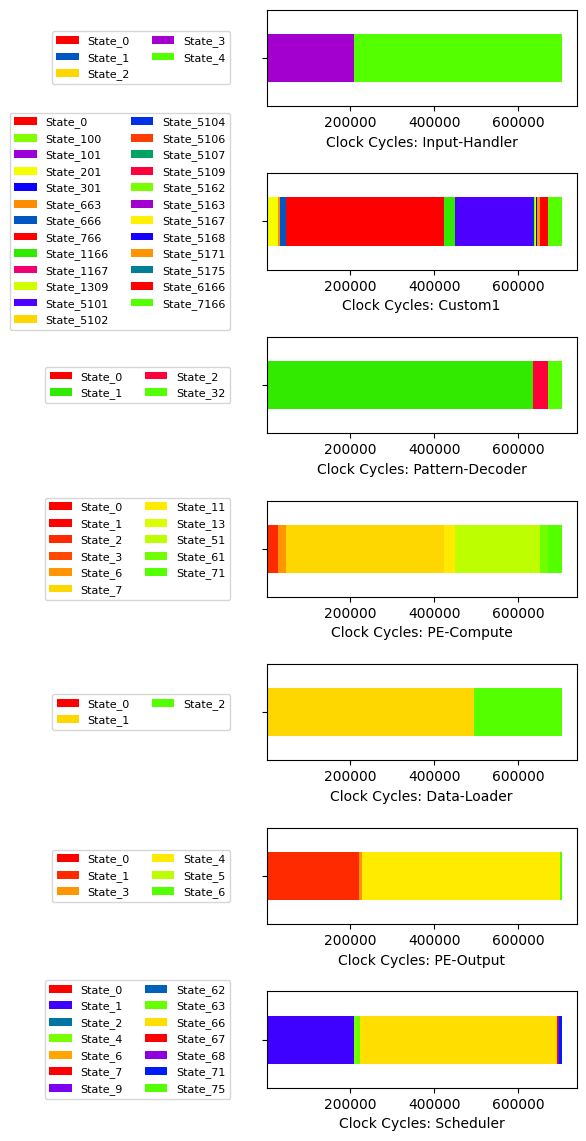

In [46]:
# filename = folder + "mm2im_2024-4-15-3-35-45.csv"
# df = pd.read_csv(filename, sep=",", header=0)


def plot(df):
    for index, row in df.iterrows():
        cols = [
            "cycles",
            "idle1",
            "load_inps",
            "load_wgts",
            "gemm1",
            "post1",
            "compute",
        ]
        for col in df.columns:
            if not col.startswith("T_"):
                row = row.drop([col])

        T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
        T_rows = list(set(T_rows))
        # empty df
        sdf = pd.DataFrame()
        Tlen = T_rows.__len__()
        fig, axs = plt.subplots(1, Tlen, figsize=(Tlen * 3, 8))
        for id, T_row in enumerate(T_rows):
            all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
            # create new df all_T_row_cols  as columns and T_row as  index
            ndf = df[all_T_row_cols]  # only first row
            ndf = ndf.iloc[index]
            # set index as T_row
            ndf = ndf.rename(T_row)

            pd.DataFrame(ndf).T.plot(
                kind="bar", stacked=True, ax=axs[id], colormap="prism"
            )
            axs[id].set_prop_cycle(
                color=[cm(1.0 * i / NUM_COLORS) for i in range(NUM_COLORS)]
            )
            axs[id].legend(
                loc="center right", bbox_to_anchor=(-2, 0.5), prop={"size": 10}, ncol=1
            )
        plt.subplots_adjust(wspace=Tlen, hspace=10)
        plt.show()
        break


def plot_h(df):
    for index, row in df.iterrows():
        cols = [
            "cycles",
            "idle1",
            "load_inps",
            "load_wgts",
            "gemm1",
            "post1",
            "compute",
        ]
        for col in df.columns:
            if not col.startswith("T_"):
                row = row.drop([col])

        T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
        T_rows = list(set(T_rows))
        # empty df
        sdf = pd.DataFrame()
        Tlen = T_rows.__len__()
        fig, axs = plt.subplots(Tlen, 1, figsize=(4, Tlen * 2))
        for id, T_row in enumerate(T_rows):
            all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
            # create new df all_T_row_cols  as columns and T_row as  index
            ndf = df[all_T_row_cols]  # only first row
            ndf = ndf.iloc[index]
            # set index as T_row
            ndf = ndf.rename(T_row)
            ndf = ndf.to_frame().T
            ax = axs[id]

            pd.DataFrame(ndf).plot(kind="barh", stacked=True, ax=ax, colormap="prism")
            ax.set_prop_cycle(
                color=[cm(1.0 * i / NUM_COLORS) for i in range(NUM_COLORS)]
            )
            legends = [i.replace("T_", "").replace(T_row,"State") for i in list(ndf.columns)]
            ax.legend(
                legends,
                loc="center right",
                bbox_to_anchor=(-0.1, 0.5),
                prop={"size": 8},
                ncol=2,
            )
            # ax.set_title("")
            ax.set_xlabel(f"Clock Cycles: {T_row}")
            # change y tick labels names
            ax.set_yticklabels("")

        plt.subplots_adjust(wspace=10, hspace=Tlen / 10)
        plt.show()
        break


# sort files by date
for profs in sorted(os.listdir(folder), key=lambda x: os.path.getctime(folder + x)):
    filename = folder + profs
    df = pd.read_csv(filename, sep=",", header=0)
    print(profs)
    plot_h(df)
    break